# Introduction

The purpose of this Jupiter notebook is to keep in mind python libraries to handle and visualize data keeping the things as simple as possible!

# Let's start

## Libraries and dataset loading
**Objective:** Import libraries, load datasets and init libraries parameters.

In [11]:
import gmaps
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Proj, transform
import seaborn as sns
import time

# Corrected dataset errors
# 2016 - 2016S000807 -missing comma in lat/lon
# 2016 - 2016S000750 -missing comma in lat/lon
# 2016 - 2016S001148 -missing comma in lat/
# 2016 - 2016S001379 -missing comma in lat/lon
# 2016 - 2016S001648 -missing comma in lat/lon
# 2016 - 2016S001984 -missing comma in lat/lon
# 2016 - 2016S004967 -missing comma in lat/lon
# 2016 - 2016S005568 -missing comma in lat/lon
# 2016 - 2016S006047 -missing comma in lat/lon
# 2016 - 2016S007360 -missing comma in lat/lon
# 2016 - 2016S007664 -missing comma in lat/lon

# Configure GMAPS with the Google API Key
gmaps.configure(api_key="your-key")

# Pandas - Parameters
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# The resulting plots are stored in the notebook document.
%matplotlib inline

# Seaborn - Parameters
plt.rcParams['figure.figsize']=(16,10)
plt.style.use('ggplot')



In [ ]:
# Datasets from http://opendata-ajuntament.barcelona.cat/

# Load dataset individually
dt_2010 = pd.read_csv("Dataset/2010_accidents.csv",encoding="cp1252", na_values=[-1, "Desconegut"], decimal=',')
dt_2011 = pd.read_csv("Dataset/2011_accidents.csv",encoding="cp1252", na_values=[-1, "Desconegut"], decimal=',')
dt_2012 = pd.read_csv("Dataset/2012_accidents.csv",encoding="cp1252", na_values=[-1, "Desconegut"], decimal=',')
dt_2013 = pd.read_csv("Dataset/2013_accidents.csv",encoding="cp1252", na_values=[-1, "Desconegut"], decimal=',')
dt_2014 = pd.read_csv("Dataset/2014_accidents.csv",encoding="utf-8", na_values=[-1, "Desconegut"], decimal=',')
dt_2015 = pd.read_csv("Dataset/2015_accidents.csv",encoding="utf-8", na_values=[-1, "Desconegut"], decimal=',')
dt_2016 = pd.read_csv("Dataset/2016_accidents.csv",encoding="utf-8", na_values=[-1, "Desconegut"], decimal=',')

# List of datasets
dt = {
    "2010": dt_2010, "2011": dt_2011, "2012": dt_2012,
    "2013": dt_2013, "2014": dt_2014, "2015": dt_2015,
    "2016": dt_2016
}



## Dataset features

**Objective:** Translate feature names, classes and group data.

| Feature (Catalan) | Feature(English) | Description |
| ------------- |-------------| -----|
| Número de expedient | AccidentID | Case File Number |
| Codi districte | DistrictCode | District code where the accident was. Barcelona is divided in several districts |
| Nom districte | DistrictName | Name of the district code where the accident was|
| Codi barri | HoodCode | Hood code where the accident was. Every district in Barcelona has several hoods |
| Nom barri | HoodName | Name of the hood where the accident was. Every district in Barcelona has several hoods |
| Codi carrer | StreetCode | Code of the street where the accident was. (Every street has a code) |
| Nom carrer | StreetName | Name of the street where the accident was |
| Num postal caption | PostalCode | Postal number of the street |
| Descripció dia setmana | DayName | Day of the weel  in text (written in Catalan) |
| Dia setmana | DayNameShort | Shortcode of the previous field (also in Catalan) |
| Descripció tipus dia | DayType | Description of the type of the day it can be "labor" or "festive" (also in Catalan) |
| NK Any | Year | Number of the year.  _Example: 2010_ |
| Mes de any | Month | Number of the month.  _Example: (1-12)_ |
| Nom mes | MonthName | Name of the month (in Catalan). _Example: Desembre_ |
| Dia de mes | NumberDayMonth | Day of the month |
| Descripció torn | PoliceWorkShift | It can be "Matí" (Morning), "Tarda" (Evening) or "Nit" (Night) |
| Hora de dia | Hour | Hour of the day (0-23) |
| Descripció causa vianant | VictimIsPedestrian |Describes the accident in case the victim is a pedestrian. If not, it says "No és causa del vianant" |
| Desc. Tipus vehicle implicat | VehicleType |Describes the type of vehicle in the accident (also in Catalan |
| Descripció sexe | VictimGender | "Home" means man, "Dona" means woman. |
| Descripció tipus persona | VictimRole | It describes if the victim is the pilot (Conductor ), passenger (Passatger), pedestrian (Vianant)|
| Edat | VictimAge | Age of the victim|
| Descripció victimització | VictimStatus | Type of injury in Catalan (slightly wounded (Ferit lleu), serious injuries (Ferit greu) or death (Mort)) |
| Coordenada UTM (Y) | UTM35Y | UTM31 Lat50 coordinate Y |
| Coordenada UTM (X) | UTM35X | UTM31 Lat50 coordinate X |
| Lon | Lon | Lon UTM31 |
| Lat | Lat | Lat UTM31 |



## Rename features and group datasets

In [ ]:
# Rename - Ugly but easy :D
column_names_24 = ["AccidentID", "DistricCode", "DistrictName", "HoodCode", "HoodName", "StreetCode", "StreetName", 
                   "PostalCode", "DayName", "DayNameShort", "DayType", "Year", "Month", "MonthName", "NumberDayMonth",
                   "Hour", "VictimIsPedestrian", "VehicleType", "VictimGender", "VictimRole", 
                   "VictimAge", "VictimStatus", "UTM35Y", "UTM35X"]
column_names_25 = ["AccidentID", "DistricCode", "DistrictName", "HoodCode", "HoodName", "StreetCode", "StreetName", 
                   "PostalCode", "DayName", "DayNameShort", "DayType", "Year", "Month", "MonthName", "NumberDayMonth",
                   "PoliceWorkShift", "Hour", "VictimIsPedestrian", "VehicleType", "VictimGender", "VictimRole", 
                   "VictimAge", "VictimStatus", "UTM35Y", "UTM35X"]
column_names_28 = ["AccidentID", "DistricCode", "DistrictName", "HoodCode", "HoodName", "StreetCode", "StreetName", 
                   "PostalCode", "DayName", "DayNameShort", "DayType", "Year", "Month", "MonthName", "NumberDayMonth",
                   "PoliceWorkShift", "Hour", "VictimIsPedestrian", "VehicleType", "VictimGender", "VictimAge", 
                   "VictimRole", "AccidentDescription", "VictimStatus", "UTM35Y", "UTM35X", "Lon", "Lat"]

for key, dataset in dt.items():
    if len(dt[key].columns) == 24:
        dt[key].columns = column_names_24
    if len(dt[key].columns) == 25:
        dt[key].columns = column_names_25
    if len(dt[key].columns) == 28:
        dt[key].columns = column_names_28    
        
    # Translate VehicleType Name
    replace_vehicle_name = {
        "VehicleType": {
            'Cami\xf3n <= 3,5 Tm': u'Cami\xf3n <= 3,5 Tm',
            u'Cami\ufffdn <= 3,5 Tm': u'Cami\xf3n <= 3,5 Tm',
            u'Autob\ufffds': u'Autob\xfas',
            u'Autob\ufffds articulado': u'Autob\xfas articulado'
        }
    }
    dataset = dataset.replace(replace_vehicle_name)

    replace_vehicle_name = {
        "VehicleType": {
            "Motocicleta": "Motorbike", "Ciclomotor": "Moped", "Bicicleta": "Cycle", "Turismo": "Car",
            "Furgoneta": "Van", "Autobús": "Bus", u"Tranv\xeda o tren": "Trolley or train", u'Autob\xfas': "Bus",
            "Cuadriciclo >=75cc": "Quad >=75cc", 'Cami\xc3\xb3n <= 3,5 Tm': "Truck <= 3,5 Tm",
            u'Autob\xc3\xbas articulado': "Articulated bus","Autobús articulado": "Articulated bus", "Microbus <=17 plazas": "Microbus <=17 seats",
            u'Tractocami\xf3n': "Tractor-trailer", "Todo terreno": "4x4", "Cuadriciclo <75cc": "Quad <75cc",
            u'Otros veh\xedc. a motor': "Other", "Maquinaria de obras": "Civil engineering machinery",
            "Autocar": "Bus", u'Tranv\ufffda o tren': "Trolley or train", u'Tractocami\ufffdn': "Tractor-trailer",
            u'Otros veh\ufffdc. a motor': "Other", u'Cami\ufffdn > 3,5 Tm': "Truck > 3.5 Tm", 
            "Camión > 3.5 Tm": "Truck > 3.5 Tm", u'Cami\xf3n <= 3,5 Tm': "Truck <= 3,5 Tm",
            u'Autob\xfas articulado': "Articulated bus", u'Cami\xf3n > 3,5 Tm': "Truck > 3.5 Tm"
        }
    }
    dataset = dataset.replace(replace_vehicle_name)
    
    replace_month_name = {
    "MonthName": {
        "Gener": "January", "Febrer": "February", "Març": "March", "Abril": "April", "Maig": "May",
        "Juny": "June", "Juliol": "July", "Agost": "August", "Septembre": "September", "Octubre": "October",
        "Novembre": "November", "Desembre": "December"
        }
    }
    dt[key] = dataset.replace(replace_month_name)

In [8]:
# Group by AccidentID
dt_group = {}
for key, dataset in dt.items():
    dt_group[key] = dataset.groupby("AccidentID").first()

# All the datasets from 2010-2016 concatenated and group by AccidentID
dt_all = pd.concat(dt_group)

Now we have the information accessible in three different ways:

* dt = a dictionary that contains all the datasets from 2010-2016
* dt_group = same that the previous one but group by AccidentID
* dt_all = all the datasets concatenated from 2010-2016 and group by AccidentID


## Missing data

Before starting with the exploration it's interesting to know which is the number of missing data.

In [10]:

# Create a Dataframe with all the missing data for each year

# First we create a dictionary like this { year : {col1: num_nans_col1, col2: num_nans_col2, ... , coln: num_nans_n}}
nan_val = {}
for key, dataset in dt.items():
    nan_val[key] = dataset.isnull().sum().to_dict()
    
# We instanciate a DataFrame object using the previous dictionary
nan_values = pd.DataFrame().from_dict(nan_val, orient='index')
display(nan_values)



,DistricCode,UTM35X,UTM35Y,PostalCode,DayName,NumberDayMonth,DistrictName,HoodCode,VictimStatus,VehicleType,Hour,StreetCode,VictimGender,MonthName,VictimAge,DayType,VictimIsPedestrian,HoodName,VictimRole,Month,AccidentID,Year,StreetName,DayNameShort,PoliceWorkShift,AccidentDescription,Lat,Lon
2010,17,17,17,17,0,0,17,17,0,0,0,17,1,0,78,0,0,17,0,0,0,0,17,0,0.0,NaN,NaN,NaN
2011,22,22,22,22,0,0,22,22,0,0,0,22,0,0,104,0,0,22,0,0,0,0,22,0,0.0,NaN,NaN,NaN
2012,19,19,19,19,0,0,19,19,0,0,0,19,0,0,102,0,0,19,0,0,0,0,19,0,0.0,NaN,NaN,NaN
2013,17,17,17,17,0,0,17,17,0,0,0,17,0,0,88,0,0,17,0,0,0,0,17,0,0.0,NaN,NaN,NaN
2014,28,28,28,28,0,0,28,28,0,0,0,28,0,0,119,0,0,28,0,0,0,0,28,0,NaN,NaN,NaN,NaN
2015,11,141,141,141,0,0,11,11,0,0,0,141,3,0,125,0,0,11,0,0,0,0,141,0,NaN,NaN,NaN,NaN
2016,15,0,0,8,0,0,15,15,0,0,0,15,1,0,111,0,0,15,0,0,0,0,0,0,0.0,3640.0,0.0,0.0


Now we knew how many NaNs for each column we have in every year dataset, this can be very useful later on to take it into account in our plots or for now more about the data, columns with NaNs are due to columns that don't exist in all the datasets.

# Plots

## Accidents per month

### Violin Plot

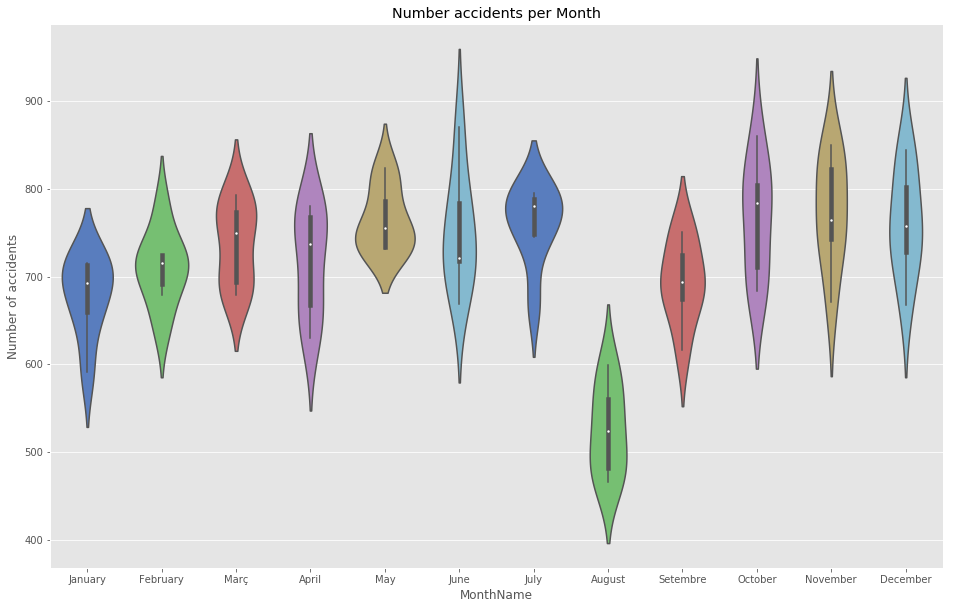

In [12]:
accidents_per_month = dt_all.sort_values("Month").groupby(['Month','MonthName','Year']).size()
accidents_per_month = accidents_per_month.reset_index()

ax = sns.violinplot(x="MonthName", y=0,data=accidents_per_month, palette="muted")
ax.set(ylabel='Number of accidents');
ax.set_title("Number accidents per Month")
plt.show(ax)

### Lines Plot

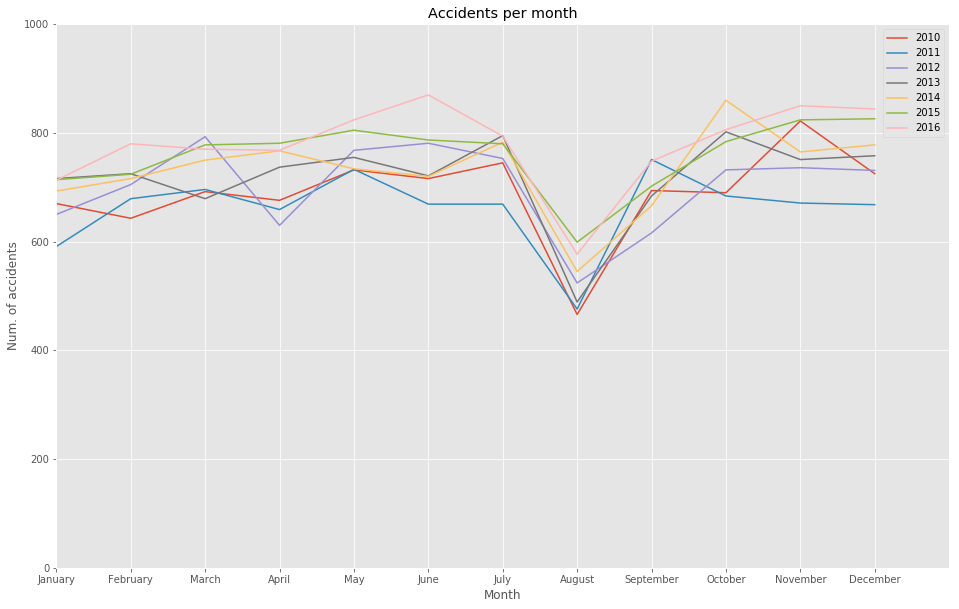

In [13]:
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']

# Accident per month
plt.xlabel("Month")
plt.xticks(range(0,12), month_lst)
plt.ylabel("Num. of accidents")
plt.title("Accidents per month")

for key, dataset in sorted(dt_group.items()):
    accidents_per_month = dataset.sort_values("Month").groupby(['Month','MonthName']).size().tolist()
    plt.plot(range(0,12),accidents_per_month,label = '%s' % key)

plt.axis([0, 12, 0, 1000])
plt.legend()
plt.show()


### What happens in August?

As can be observed in the violin plot the average of accidents it reduces on August, my assumption is that probably is due the summer holidays and that probably the ***urban*** accidents are reduced in the city but are directly proportional to the increases on the highways and main road accidents. 

## Accidents by gender

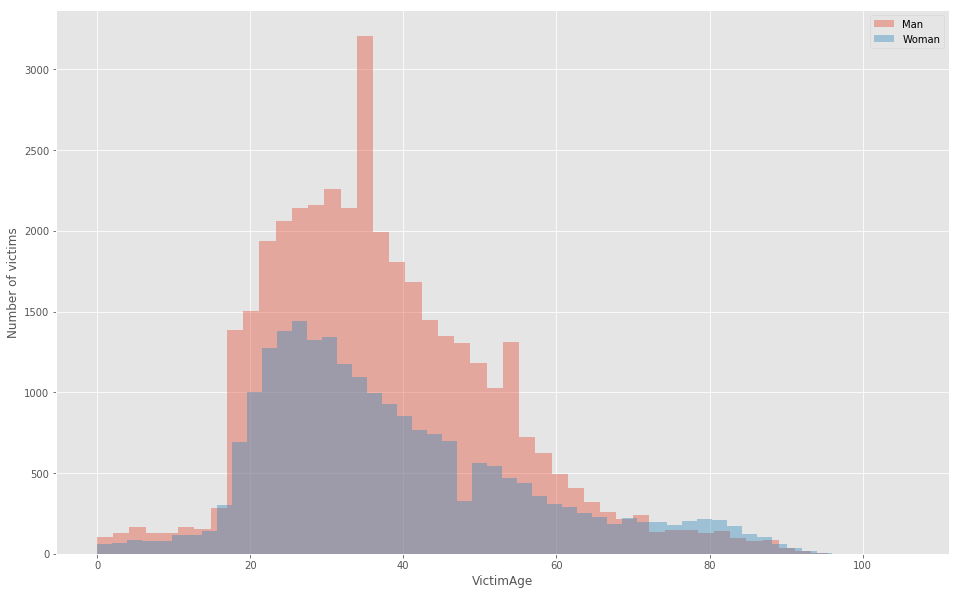

In [14]:
sns.distplot(dt_all[dt_all["VictimGender"]=="Home"]["VictimAge"].dropna(),kde=False,label="Man")
sns.distplot(dt_all[dt_all["VictimGender"]=="Dona"]["VictimAge"].dropna(),kde=False,label="Woman")
plt.legend()
plt.ylabel("Number of victims");

## Accidents by gender and age


In [15]:
plt.rcParams['figure.figsize']=(16,10)

def histogram_accidents_gender_age(year):
    actual_dt = dt_group[str(year)]
    sns.distplot(actual_dt[actual_dt["VictimGender"]=="Home"]["VictimAge"].dropna(),kde=False,label="Man")
    sns.distplot(actual_dt[actual_dt["VictimGender"]=="Dona"]["VictimAge"].dropna(),kde=False,label="Woman")
    plt.ylabel("Number of victims")
    plt.legend()
    plt.show()


interact(histogram_accidents_gender_age,
         year=widgets.IntSlider(min=2010,max=2016,value=2010,description="Year:"));
         


interactive(children=(IntSlider(value=2010, description=u'Year:', max=2016, min=2010), Output()), _dom_classes=('widget-interact',))

From the previous plots (3.2 and 3.3), it's clear that the mans are the most injured and furthermore the ones from 30 to 50 years old, another curious think it's that the number of women injured from 60 to 80 is higher than men, probably this is so much related to the life expectancy, OCDE explains that woman live up to five years longer than men.

## Accidents by vehicle type

### Most occurrences (Monthly)

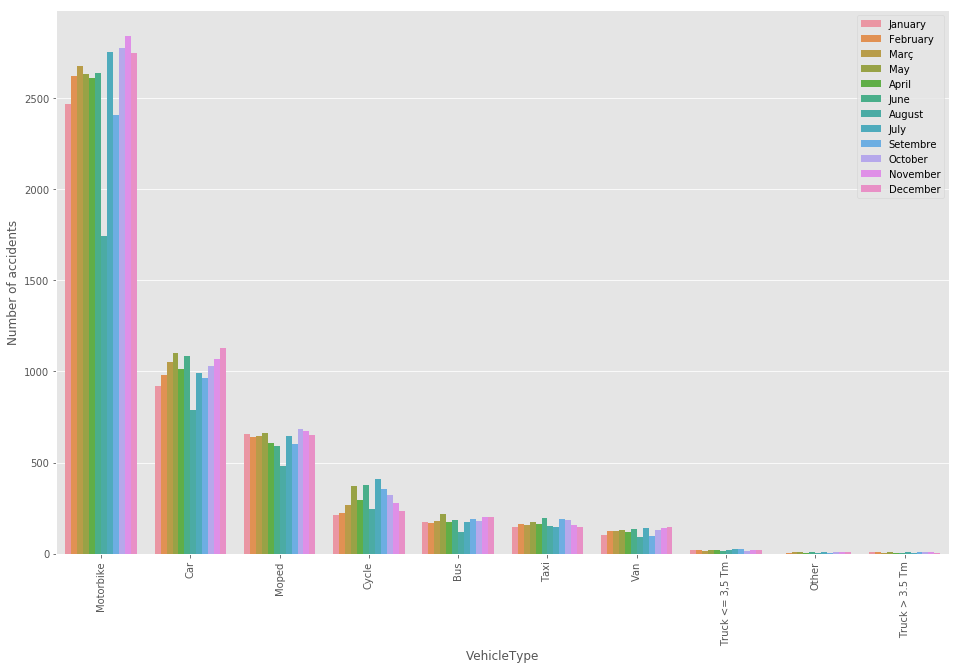

In [16]:
order = dt_all['VehicleType'].value_counts().index[:10]
fig = sns.countplot(x="VehicleType",hue="MonthName", data=dt_all, order=order)
plt.setp(fig.xaxis.get_majorticklabels(), rotation=90)
fig.set_ylabel('Number of accidents')
fig.legend(loc=1)
fig.update;

### Most ocurrencies (Yearly)

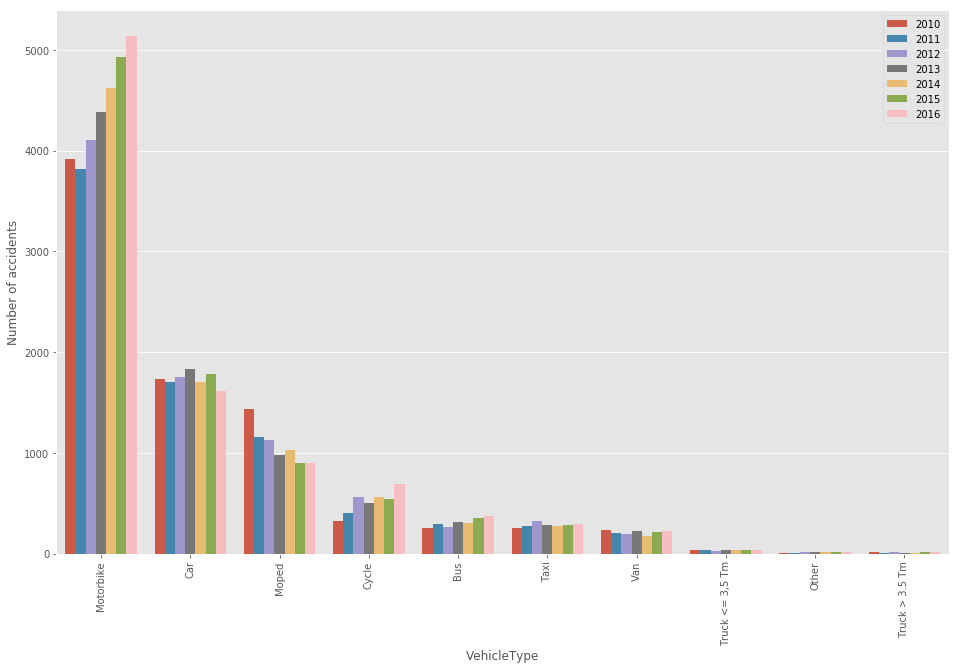

In [17]:
order = dt_all['VehicleType'].value_counts().index[:10]
fig = sns.countplot(x="VehicleType",hue="Year", data=dt_all, order=order)
plt.setp(fig.xaxis.get_majorticklabels(), rotation=90)
fig.set_ylabel('Number of accidents')
fig.legend(loc=1)
fig.update;

In [18]:
def number_accidents_by_vehicle_type(year):
    order = dt_group[str(year)]['VehicleType'].value_counts().index[:10]
    fig = sns.countplot(x="VehicleType", data=dt_group[str(year)], order=order);
    plt.setp(fig.xaxis.get_majorticklabels(), rotation=90)
    fig.set_ylabel('Number of accidents')
    fig.set_title("Number of accidents by vehicle type - Year " + str(year))
    fig.update


interact(number_accidents_by_vehicle_type,
         year=widgets.IntSlider(min=2010,max=2016,value=2010,description="Year:"));

interactive(children=(IntSlider(value=2010, description=u'Year:', max=2016, min=2010), Output()), _dom_classes=('widget-interact',))

## Accidents by vehicle type and age

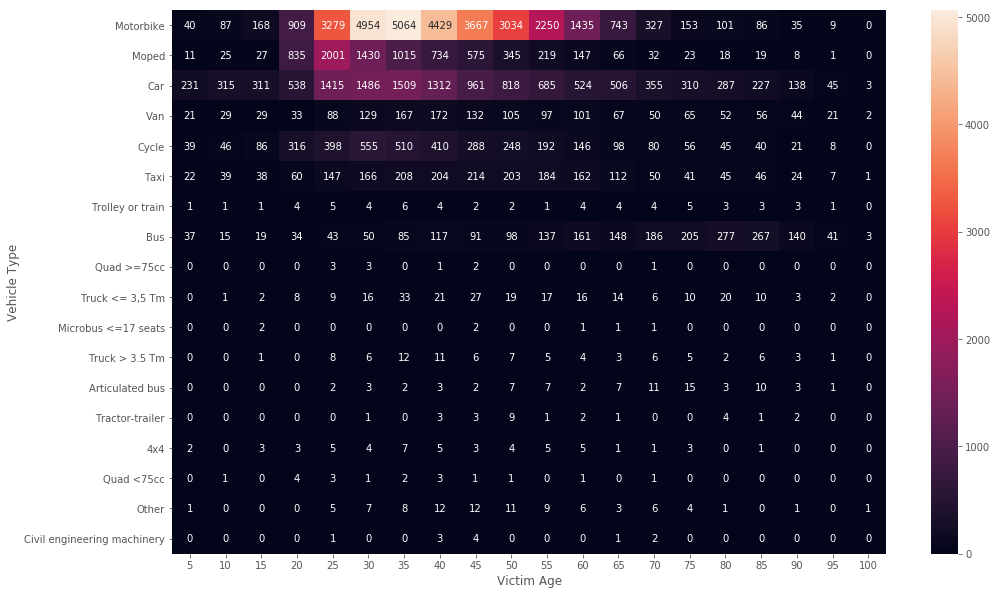

In [21]:
vehicle_types = dt_all["VehicleType"].unique()
bins = range(0,105,5)

heatmap = []
for vehicle_type in vehicle_types:
    actual_data = dt_all[dt_all["VehicleType"]==vehicle_type]
    hist, bins = np.histogram(actual_data["VictimAge"].dropna(),bins=bins)
    heatmap.append(hist)
arr2d = np.array(heatmap)

ax = sns.heatmap(arr2d, yticklabels=vehicle_types, xticklabels=bins[1:], annot=True, fmt="d")
ax.set_ylabel('Vehicle Type')
ax.set_xlabel('Victim Age');

## Top 10 - Dangerous streets

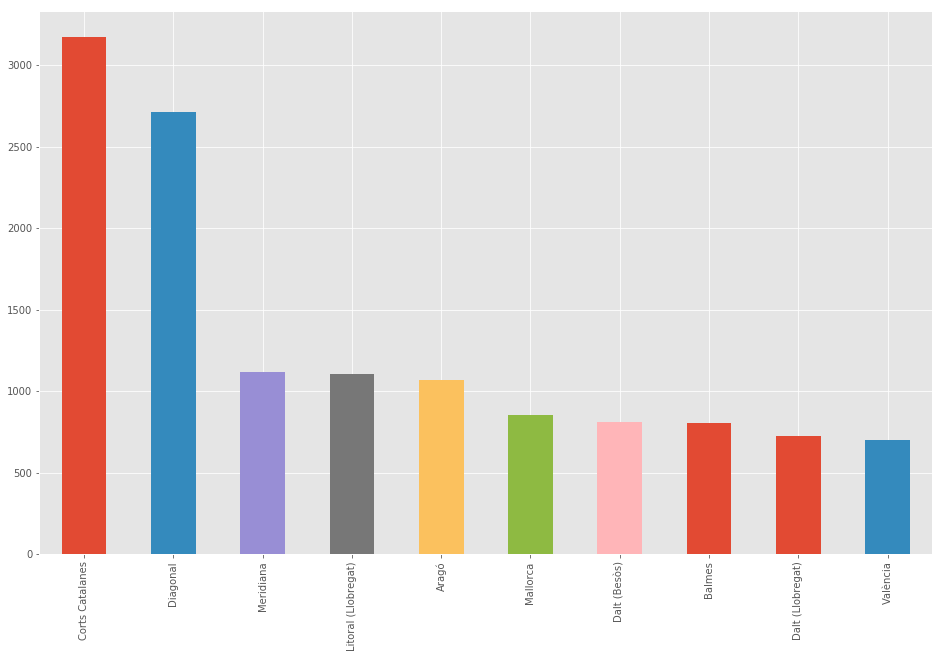

In [26]:
ax = dt_all["StreetName"].value_counts()[:10].plot.bar()

# Maps

Also, can be interesting to observe every year accidents in a heat map of the city to identify visually which are the hoods with more accidents and try to get an overview to identify hotspots. First of all 

## Preprocessing - UTM35 to LatLon

Most of the map libraries use latitude and longitude references, our first step is to convert our UTM data to LatLon longitudes, for this task I use the utm library.

Let's go!

In [ ]:
inProj = Proj(init='epsg:23031')
outProj = Proj(init='epsg:4326')

def utm_to_latlon(row):
    lon, lat =  transform(inProj,outProj,row["UTM35X"],row["UTM35Y"])
    return (lat, lon)

def join_latlon(row):
    return (float(row["Lat"]), float(row["Lon"]))

for key, dataset in dt.items():
    
    # If exist the lat lon columns drop the UTM
    no_nan_dataset = dataset.dropna()
    
    if "Lat" in no_nan_dataset.columns and "Lon" in no_nan_dataset.columns:
        dataset["LatLon"] = no_nan_dataset.apply(lambda row: join_latlon(row), axis=1)
        # Drop UTM columns
        dataset.drop(["UTM35X", "UTM35Y"], axis=1, inplace=True, errors="ignore")
    else:
        # Create a new column LatLon applying the utm_to_latlon method to each row
        dataset["LatLon"] = no_nan_dataset.apply(lambda row: utm_to_latlon(row), axis=1)
        # Drop UTM columns
        dataset.drop(["UTM35X", "UTM35Y"], axis=1, inplace=True, errors="ignore")

## Preprocessing - Agrupate same incident
As we can see in the next cell in some accidents as is common have more than one injuried. If we want to plot a Heatmap we don't want to count multiple times the same accident is for this that we group de data by __AccidentId__.

In [34]:
# Example of an accident with multiple injuried people
display(dt["2013"][44:46])

# Group the Accidents and convert to a list
latlon = {}
for key, dataset in dt.items():
    latlon[key] = dataset.groupby("AccidentID")["LatLon"].first().dropna().tolist()

,AccidentID,DistricCode,DistrictName,HoodCode,HoodName,StreetCode,StreetName,PostalCode,DayName,DayNameShort,DayType,Year,Month,MonthName,NumberDayMonth,PoliceWorkShift,Hour,VictimIsPedestrian,VehicleType,VictimGender,VictimRole,VictimAge,VictimStatus,LatLon
44,2013S002587,2.0,Eixample,5.0,el Fort Pienc,18505.0,Aragó,0410 0410,Dijous,Dj,Laboral,2013,4,April,11,Matí,6,No és causa del vianant,Car,Home,Conductor,52.0,Ferit lleu,"(41.3992421661, 2.17464595179)"
45,2013S002587,2.0,Eixample,5.0,el Fort Pienc,18505.0,Aragó,0410 0410,Dijous,Dj,Laboral,2013,4,April,11,Matí,6,No és causa del vianant,Car,Home,Passatger,29.0,Ferit lleu,"(41.3992421661, 2.17464595179)"


## Heatmap

In [33]:
class HeatmapUpdate(object):
    
    def __init__(self, datasets, center, zoom, default_value):
        self._datasets = datasets
        self._figure = gmaps.figure(center=center, zoom_level=zoom)
        self._heatmap = gmaps.heatmap_layer(datasets[default_value])
        self._figure.add_layer(self._heatmap)
        
    def render(self):
        return display(self._figure)
    
    def update_heatmap(self, year):
        self._heatmap.locations = self._datasets[str(year)] # update the locations drawn on the heatmap

In [35]:
animation = HeatmapUpdate(latlon , (41.383, 2.183), 12, "2010")


def update_heatmap_aux(year):
    animation.update_heatmap(year)
    
interact(update_heatmap_aux, year=widgets.IntSlider(min=2010,max=2016,value=2010,description="Year:"));
animation.render()

interactive(children=(IntSlider(value=2010, description=u'Year:', max=2016, min=2010), Output()), _dom_classes=('widget-interact',))

Figure()